In [2]:
%pylab inline
import numpy as np
import schwimmbad
import gala.potential as gp
import coeff_parallel as cop
from scipy import special
import biff

Populating the interactive namespace from numpy and matplotlib


In [3]:
sys.path.append('../../MW-LMC-SCF/code')
import mwlmc_bfe
from coefficients_smoothing import read_coeff_matrix

In [24]:
def spherical_coordinates(pos):
    r = (pos[:,0]**2 + pos[:,1]**2 + pos[:,2]**2)**0.5 
    theta = np.arccos(pos[:,2]/r)
    phi = np.arctan2(pos[:,1], pos[:,0]) + np.pi
    return r, theta, phi
    
def bfe_pot(pos, n, l, m):
    r, theta, phi = spherical_coordinates(pos)
    rho_l = -r**l/(1+r)**(2*l+1)
    rho_nlm = special.eval_gegenbauer(n, 2*l+1.5, (r-1)/(r+1)) * special.sph_harm(m, l, phi, theta)
    return (4*np.pi)**0.5 * rho_l * rho_nlm 

def nlm_list(ncoeff, nmax, lmax):
    n_list = np.zeros(ncoeff)
    l_list = np.zeros(ncoeff)
    m_list = np.zeros(ncoeff)
    i=0
    for n in range(nmax):
        for l in range(lmax):
            for m in range(l+1):
                n_list[i] = n 
                l_list[i] = l
                m_list[i] = m
                i+=1
    return n_list, l_list, m_list

def potential(pos, S, T, M, r_s, nmax, lmax):
    G = 1
    r, theta, phi = spherical_coordinates(pos)
    n, l, m = nlm_list(len(S), nmax, lmax)
    pot=0
    for i in range(len(S)):
        pot += bfe_pot(pos, n[i], l[i], m[i]) * (S[i]*cos(m[i]*phi) + T[i]*sin(m[i]*phi))
    return pot*G*M/r_s
    

In [17]:
Phi = potential(pos, S, T, 1, 40.85, 21, 21)

In [18]:
Phi

array([-0.02374977+5.39581855e-06j, -0.0421567 +1.82122867e-05j,
       -0.08503034+9.33096705e-05j, -0.02395516+5.92262253e-06j,
       -0.06786135+6.05463128e-05j, -0.0259559 +4.31266458e-06j,
       -0.04396308+2.79715280e-05j, -0.04185078+1.90816872e-05j,
       -0.0253119 +1.62818347e-06j, -0.02102338+3.46993832e-06j,
       -0.02938832+9.96294743e-06j, -0.03764615+2.87995536e-05j,
       -0.0336334 +1.88085573e-05j, -0.0279665 +7.42575714e-06j,
       -0.03416373+9.81819419e-08j, -0.03407606-5.95031113e-07j,
       -0.02613223+2.04335630e-06j, -0.0257799 -3.05376718e-07j,
       -0.02889183+3.64237692e-06j, -0.02200452+3.84581748e-06j,
       -0.07126086+7.30265807e-05j, -0.02977542+1.37571644e-05j,
       -0.03025413+6.68847051e-06j, -0.03118101+1.83375910e-06j,
       -0.02438824+1.99561895e-06j, -0.07159644+1.13637443e-05j,
       -0.03609342+2.29233330e-06j, -0.02582704+5.36535046e-06j,
       -0.03179459+1.13095376e-05j, -0.05432951+7.77309757e-06j,
       -0.0211686 +2.0833

In [11]:
Smatrix = mwlmc_bfe.coefficients_smoothing.reshape_matrix(S, 20, 20, 20)
Tmatrix = mwlmc_bfe.coefficients_smoothing.reshape_matrix(T, 20, 20, 20)

In [16]:
potbiff = biff.potential(np.ascontiguousarray(pos.astype(double)), Smatrix, Tmatrix, r_s=40.85)

In [23]:
potbiff 

array([-0.88403764, -1.34346706, -2.00915665, -0.88864206, -1.79331792,
       -0.94003929, -1.37609094, -1.33509042, -0.91724611, -0.80026165,
       -1.03506879, -1.25508462, -1.14944143, -1.00027981, -1.14448835,
       -1.14184726, -0.94586827, -0.93401883, -1.01931794, -0.82210087,
       -1.82627595, -1.05599024, -1.06153206, -1.07466422, -0.8961518 ,
       -1.83765164, -1.19652997, -0.93808265, -1.10055887, -1.56299631,
       -0.80216786, -1.57785756, -1.03226399, -1.30039342, -1.50697264,
       -0.93208384, -1.31997287, -1.10338314, -1.0911735 , -1.08333451,
       -0.99460645, -0.96280222, -1.19188548, -0.98283765, -0.88420505,
       -0.99006663, -0.96705504, -1.09547481, -1.36472472, -1.14655323,
       -1.03122443, -1.25631646, -1.31735999, -1.14942575, -1.26572732,
       -0.99897182, -0.95260135, -1.4152092 , -0.83634309, -1.26168243,
       -1.38585111, -1.0826522 , -1.61050328, -1.4724041 , -0.90735701,
       -1.3576387 , -1.34152631, -2.0650135 , -0.99395603, -0.97

In [22]:
Phi.real

array([-0.02374977, -0.0421567 , -0.08503034, -0.02395516, -0.06786135,
       -0.0259559 , -0.04396308, -0.04185078, -0.0253119 , -0.02102338,
       -0.02938832, -0.03764615, -0.0336334 , -0.0279665 , -0.03416373,
       -0.03407606, -0.02613223, -0.0257799 , -0.02889183, -0.02200452,
       -0.07126086, -0.02977542, -0.03025413, -0.03118101, -0.02438824,
       -0.07159644, -0.03609342, -0.02582704, -0.03179459, -0.05432951,
       -0.0211686 , -0.05533892, -0.02945454, -0.04044485, -0.04992872,
       -0.02557406, -0.04077747, -0.03210946, -0.0318516 , -0.0311646 ,
       -0.02798272, -0.02678004, -0.03580612, -0.02749297, -0.02413508,
       -0.02788402, -0.02666946, -0.03184424, -0.04222556, -0.03360806,
       -0.02925903, -0.03797778, -0.04053285, -0.03395637, -0.03910527,
       -0.02834541, -0.02611089, -0.04575275, -0.02264855, -0.03876288,
       -0.04505472, -0.03131062, -0.05719446, -0.04839088, -0.02484069,
       -0.04310263, -0.04253154, -0.09120951, -0.02812132, -0.02

In [10]:
coeff = np.loadtxt('../../time-dependent-BFE/data/BFE MWLMC5_b1snap_100.txt')
S = coeff[:,0]
T = coeff[:,2]

In [8]:
pos = np.random.randint(-100, 100, (100, 3))

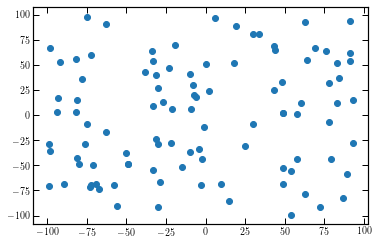

In [9]:
scatter(pos[:,1], pos[:,2])